In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import io
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

import scipy.stats as stats
from scipy.stats import kendalltau, pearsonr, spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols

from datetime import datetime, date

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files

africa = files.upload()
investment = files.upload()

KeyboardInterrupt: ignored

In [ ]:
africa_df = pd.read_csv(io.BytesIO(africa["ObservationData_lavlqce.csv"]))
investmentdf = pd.read_excel(io.BytesIO(investment["FDIData_10Jan2022.xlsx"]), header = [0, 1])

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
investmentdf.head()

Chinese FDI Stock in African Countries                                \
                      US$ mn, unadjusted Regional Algeria Angola Benin   
0                                   1990      NaN     NaN    NaN   NaN   
1                                   1991      NaN     NaN    NaN   NaN   
2                                   1992      NaN     NaN    NaN   NaN   
3                                   1993      NaN     NaN    NaN   NaN   
4                                   1994      NaN     NaN    NaN   NaN   

                                                                      \
  Botswana Burkina Faso Burundi Cameroon Cape Verde CAR Chad Comoros   
0      NaN          NaN     NaN      NaN        NaN NaN  NaN     NaN   
1      NaN          NaN     NaN      NaN        NaN NaN  NaN     NaN   
2      NaN          NaN     NaN      NaN        NaN NaN  NaN     NaN   
3      NaN          NaN     NaN      NaN        NaN NaN  NaN     NaN   
4      NaN          NaN     NaN      NaN        NaN NaN  NaN     NaN   

                                                                               \
  Congo, Rep. Congo, Dem. Rep. Cote d'Ivoire Djibouti Egypt Equatorial Guinea   
0         NaN              NaN           NaN      NaN   NaN               NaN   
1         NaN              NaN           NaN      NaN   NaN               NaN   
2         NaN              NaN           NaN      NaN   NaN               NaN   
3         NaN              NaN           NaN      NaN   NaN               NaN   
4         NaN              NaN           NaN      NaN   NaN               NaN   

                                                                           \
  Eritrea Ethiopia Fmr. Sudan Gabon The Gambia Ghana Guinea Guinea-Bissau   
0     NaN      NaN        NaN   NaN        NaN   NaN    NaN           NaN   
1     NaN      NaN        NaN   NaN        NaN   NaN    NaN           NaN   
2     NaN      NaN        NaN   NaN        NaN   NaN    NaN           NaN   
3     NaN      NaN        NaN   NaN        NaN   NaN    NaN           NaN   
4     NaN      NaN        NaN   NaN        NaN   NaN    NaN           NaN   

                                                                           \
  Kenya Lesotho Liberia Libya Madagascar Malawi Mali Mauritania Mauritius   
0   NaN     NaN     NaN   NaN        NaN    NaN  NaN        NaN       NaN   
1   NaN     NaN     NaN   NaN        NaN    NaN  NaN        NaN       NaN   
2   NaN     NaN     NaN   NaN        NaN    NaN  NaN        NaN       NaN   
3   NaN     NaN     NaN   NaN        NaN    NaN  NaN        NaN       NaN   
4   NaN     NaN     NaN   NaN        NaN    NaN  NaN        NaN       NaN   

                                                                               \
  Morocco Mozambique Namibia Niger Nigeria Rwanda Sao Tome & Principe Senegal   
0     NaN        NaN     NaN   NaN     NaN    NaN                 NaN     NaN   
1     NaN        NaN     NaN   NaN     NaN    NaN                 NaN     NaN   
2     NaN        NaN     NaN   NaN     NaN    NaN                 NaN     NaN   
3     NaN        NaN     NaN   NaN     NaN    NaN                 NaN     NaN   
4     NaN        NaN     NaN   NaN     NaN    NaN                 NaN     NaN   

                                                                           \
  Seychelles Sierra Leone Somalia South Africa South Sudan Sudan Eswatini   
0        NaN          NaN     NaN          NaN         NaN   NaN      NaN   
1        NaN          NaN     NaN          NaN         NaN   NaN      NaN   
2        NaN          NaN     NaN          NaN         NaN   NaN      NaN   
3        NaN          NaN     NaN          NaN         NaN   NaN      NaN   
4        NaN          NaN     NaN          NaN         NaN   NaN      NaN   

                                                                          \
  Tanzania Togo Tunisia Uganda Western Sahara Zambia Zimbabwe Zimbabwe.1   
0      NaN  NaN     NaN    NaN            NaN    NaN      NaN        N

Looks like there is some good info for the years we're concerned with. Let's make these Chinese investment numbers easier to work with by creating a newly formatted dataframe. For any NaN values, we'll assume non-investment by setting the value to a very small number like .01 -- this is a workaround in order to be able to log-transform the data, while still retaining a value small enough to essentially indicate non-investment that year. 

In [ ]:
idf = pd.DataFrame()
idf["Country"] = investmentdf.iloc[0]
idf["2003_invest"] = investmentdf.iloc[13]
idf["2004_invest"] = investmentdf.iloc[14]
idf["2005_invest"] = investmentdf.iloc[15]
idf["2006_invest"] = investmentdf.iloc[16]
idf["2007_invest"] = investmentdf.iloc[17]
idf["2008_invest"] = investmentdf.iloc[18]
idf["2009_invest"] = investmentdf.iloc[19]
idf["2010_invest"] = investmentdf.iloc[20]
idf["2011_invest"] = investmentdf.iloc[21]
idf["2012_invest"] = investmentdf.iloc[22]
idf["2013_invest"] = investmentdf.iloc[23]
idf["2014_invest"] = investmentdf.iloc[24]
idf["2015_invest"] = investmentdf.iloc[25]
idf["2016_invest"] = investmentdf.iloc[26]
idf["2017_invest"] = investmentdf.iloc[27]
idf["2018_invest"] = investmentdf.iloc[28]
idf["2019_invest"] = investmentdf.iloc[29]
idf["2020_invest"] = investmentdf.iloc[30]
idf.dropna(how = 'all')
cleaner_invest = idf.iloc[2:]
cleaner_invest.reset_index(inplace=True)
cleaner_invest = cleaner_invest.drop(['level_0', 'Country'], axis = 1)
cleaner_invest.rename(columns = {'level_1':'Country'}, inplace = True)
cleaner_invest = cleaner_invest.dropna(how = 'all')

Checking the other dataframe, let's modify it to suit our needs by changing the year column to each year being a separate column.

In [ ]:
africa_df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),"Gross capital formation, Private sector (current US$)","Gross capital formation, Public sector (current US$)",Exports of goods and services (current US$),Imports of goods and services (current US$),Final consumption expenditure (% of GDP),General government final consumption expenditure (% of GDP),Household final consumption expenditure (% of GDP),Gross capital formation (% of GDP),"Gross capital formation, Private sector (% GDP)","Gross capital formation, Public sector (% GDP)",Exports of goods and services (% of GDP),Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,NaN,NaN,3038.14,2236.36,1104.30,238.76,865.54,306.24,90.26,215.98,307.48,480.36,49.38,10.68,38.70,13.69,4.04,9.66,13.75,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,NaN
1,Malawi,1981,-13.06,-10.81,2709.74,2236.40,1091.26,221.16,870.10,218.14,91.70,126.44,317.66,389.37,48.80,9.89,38.91,9.75,4.10,5.65,14.20,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.01
2,Malawi,1982,-0.93,1.44,2748.84,2113.68,1002.45,206.82,795.63,252.58,153.01,99.57,265.46,340.40,47.43,9.78,37.64,11.95,7.24,4.71,12.56,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.52
3,Malawi,1983,1.56,4.21,2864.70,2203.66,1037.06,200.81,836.26,278.87,176.89,101.98,253.84,346.54,47.06,9.11,37.95,12.65,8.03,4.63,11.52,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.77
4,Malawi,1984,0.54,3.92,2976.95,2157.88,1028.95,189.62,839.34,155.58,37.64,117.94,342.72,319.23,47.68,8.79,38.90,7.21,1.74,5.47,15.88,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.74


Now years are columns, very good. 

In [ ]:
africa_df = (africa_df.loc[(africa_df['Year'] >= 2003) & (africa_df['Year'] <= 2020)])
africa_df = africa_df.reset_index().pivot(columns='Year', index='Country', values=['Real GDP growth (annual %)', 'Gross domestic product, (constant prices US$)'])
africa_df.reset_index(inplace=True)
africa_df.head()

Country Real GDP growth (annual %)                              \
Year                                     2003   2004   2005   2006   2007   
0          Algeria                       7.24   4.34   5.94   1.74   3.44   
1           Angola                       2.99  10.95  15.03  11.55  14.01   
2            Benin                       3.44   4.43   1.71   3.95   5.99   
3         Botswana                       4.63   2.71   4.56   8.36   8.28   
4     Burkina Faso                       8.04   4.48   8.73   6.03   4.44   

                                                                            \
Year   2008  2009  2010      2011      2012       2013      2014      2015   
0      2.44  1.64  3.64  2.900000  3.400000   2.840000  3.800000  3.700000   
1     11.17  0.86  4.86  3.471981  8.542147   4.954590  4.822626  0.943576   
2      4.89  2.32  2.12  2.964000  4.811000   7.191000  6.358000  1.778000   
3      6.25 -7.65  8.56  6.000000  4.456145  11.343397  4.149262 -1.697935   
4      5.63  2.96  8.44  6.600000  6.452672   5.792585  4.326846  3.921229   

                                                        \
Year      2016      2017      2018      2019      2020   
0     3.200000  1.300000  1.400000  0.800000 -4.737985   
1    -2.580097 -0.147207 -2.003577 -0.600000 -4.520618   
2     3.340000  5.672000  6.697000  6.865687  2.311357   
3     4.303767  2.903998  4.478837  2.966126 -8.899091   
4     5.957977  6.203489  6.731236  5.699435 -0.206372   

     Gross domestic product, (constant prices US$)                        \
Year                                          2003       2004       2005   
0                                        128419.81  133993.23  141952.43   
1                                         43913.67   48723.48   56046.09   
2                                          5434.86    5675.60    5772.74   
3                                          9527.29    9785.08   10230.96   
4                                          6052.52    6323.97    6875.95   

                                                                            \
Year       2006       2007       2008       2009       2010           2011   
0     144422.40  149390.53  153035.66  155545.45  161207.30  165882.311300   
1      62518.11   71276.98   79235.77   79916.18   83799.48   86708.987140   
2       6000.60    6359.82    6671.03    6825.75    6970.24    7176.838523   
3      11086.67   12004.30   12754.01   11778.03   12786.65   13553.850930   
4       7290.73    7614.50    8042.89    8281.25    8980.02    9572.706573   

                                                                  \
Year           2012           2013           2014           2015   
0     171522.309900  176393.543500  183096.498100  189871.068500   
1      94115.796580   98778.848870  103542.582900  104519.585400   
2       7522.116224    8063.031602    8575.679151    8728.154727   
3      14157.830110   15763.808980   16417.890750   16139.125570   
4      10190.401970   10780.689650   11247.153440   11688.180060   

                                                                              
Year           2016           2017          2018          2019          2020  
0     195946.942700  198494.253000  201273.17250  202883.35790  193270.77580  
1     101822.878500  101672.987700   99635.89131   99038.07596   94560.94247  
2       9019.675095    9531.271066   10169.58029   10867.79180   11118.98528  
3      16833.716010   17322.566730   18098.41618   18635.23794   16976.87120  
4      12384.559110   13152.833920   14038.18216   14838.27922   14807.65720

Let's merge the two together and take a look.

In [ ]:
merged_df = pd.merge(left = cleaner_invest, right = africa_df, left_on = "Country", right_on = "Country", how = "inner")
merged_df = merged_df.dropna()
merged_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,Country,2003_invest,2004_invest,2005_invest,2006_invest,2007_invest,2008_invest,2009_invest,2010_invest,2011_invest,2012_invest,2013_invest,2014_invest,2015_invest,2016_invest,2017_invest,2018_invest,2019_invest,2020_invest,"(Real GDP growth (annual %), 2003)","(Real GDP growth (annual %), 2004)","(Real GDP growth (annual %), 2005)","(Real GDP growth (annual %), 2006)","(Real GDP growth (annual %), 2007)","(Real GDP growth (annual %), 2008)","(Real GDP growth (annual %), 2009)","(Real GDP growth (annual %), 2010)","(Real GDP growth (annual %), 2011)","(Real GDP growth (annual %), 2012)","(Real GDP growth (annual %), 2013)","(Real GDP growth (annual %), 2014)","(Real GDP growth (annual %), 2015)","(Real GDP growth (annual %), 2016)","(Real GDP growth (annual %), 2017)","(Real GDP growth (annual %), 2018)","(Real GDP growth (annual %), 2019)","(Real GDP growth (annual %), 2020)","(Gross domestic product, (constant prices US$), 2003)","(Gross domestic product, (constant prices US$), 2004)","(Gross domestic product, (constant prices US$), 2005)","(Gross domestic product, (constant prices US$), 2006)","(Gross domestic product, (constant prices US$), 2007)","(Gross domestic product, (constant prices US$), 2008)","(Gross domestic product, (constant prices US$), 2009)","(Gross domestic product, (constant prices US$), 2010)","(Gross domestic product, (constant prices US$), 2011)","(Gross domestic product, (constant prices US$), 2012)","(Gross domestic product, (constant prices US$), 2013)","(Gross domestic product, (constant prices US$), 2014)","(Gross domestic product, (constant prices US$), 2015)","(Gross domestic product, (constant prices US$), 2016)","(Gross domestic product, (constant prices US$), 2017)","(Gross domestic product, (constant prices US$), 2018)","(Gross domestic product, (constant prices US$), 2019)","(Gross domestic product, (constant prices US$), 2020)"
0,Algeria,5.7,34.49,171.21,247.37,393.89,508.82,751.26,937.26,1059.45,1305.33,1497.21,2451.57,2531.55,2552.48,1833.66,2062.86,1775.35,1643.5174,7.24,4.34,5.94,1.74,3.44,2.44,1.64,3.64,2.900000,3.400000,2.840000,3.800000,3.700000,3.200000,1.300000,1.400000,0.800000,-4.737985,128419.81,133993.23,141952.43,144422.40,149390.53,153035.66,155545.45,161207.30,165882.311300,171522.309900,176393.543500,183096.498100,189871.068500,195946.942700,198494.253000,201273.172500,202883.357900,193270.775800
1,Angola,0.3,0.47,8.79,37.23,78.46,68.89,195.54,351.77,400.59,1245.1,1634.74,1214.04,1268.29,1633.21,2260.16,2299.19,2890.73,2690.09,2.99,10.95,15.03,11.55,14.01,11.17,0.86,4.86,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,-2.003577,-0.600000,-4.520618,43913.67,48723.48,56046.09,62518.11,71276.98,79235.77,79916.18,83799.48,86708.987140,94115.796580,98778.848870,103542.582900,104519.585400,101822.878500,101672.987700,99635.891310,99038.075960,94560.942470
2,Benin,7.71,20.51,19.0,22.12,35.6,53.15,54.01,39.33,40.03,47.6,49.91,69.17,87.31,102.51,104.37,103.99,91.44,75.46,3.44,4.43,1.71,3.95,5.99,4.89,2.32,2.12,2.964000,4.811000,7.191000,6.358000,1.778000,3.340000,5.672000,6.697000,6.865687,2.311357,5434.86,5675.60,5772.74,6000.60,6359.82,6671.03,6825.75,6970.24,7176.838523,7522.116224,8063.031602,8575.679151,8728.154727,9019.675095,9531.271066,10169.580290,10867.791800,11118.985280
3,Botswana,2.1,3.8,18.12,25.52,43.39,65.26,119.25,178.52,200.38,220.15,230.9,262.13,321.08,437.5,296.87,258.16,186.28,190.43,4.63,2.71,4.56,8.36,8.28,6.25,-7.65,8.56,6.000000,4.456145,11.343397,4.149262,-1.697935,4.303767,2.903998,4.478837,2.966126,-8.899091,9527.29,9785.08,10230.96,11086.67,12004.30,12754.01,11778.03,12786.65,13553.850930,14157.830110,15763.808980,16417.890750,16139.125570,16833.716010,17322.566730,18098.416180,18635.237940,16976.871200
5,Burundi,0.0,0.02,0.0,1.65,1.65,1.65,4.64,6.51,7.2,8.7,9.79,13.24,12.37,12.42,10.29,12.52,8.2,10.52,-1.22,4.83,0.91,5.42,3.50,4.86,3.81,5.12,4.032602,4.400000,4.900000,4.200000,-0.400000,3.200000,3.800000,4.200000,4.100000,-3.274460,15

Renaming the columns so that they are easier to work with. 

In [ ]:
mdf = merged_df.rename(columns={merged_df.columns[19]: '2003_growthGDP', merged_df.columns[20]: '2004_growthGDP', merged_df.columns[21]: '2005_growthGDP', merged_df.columns[22]: '2006_growthGDP', merged_df.columns[23]: '2007_growthGDP',
                                merged_df.columns[24]: '2008_growthGDP', merged_df.columns[25]: '2009_growthGDP', merged_df.columns[26]: '2010_growthGDP', merged_df.columns[27]: '2011_growthGDP', merged_df.columns[28]: '2012_growthGDP', 
                                merged_df.columns[29]: '2013_growthGDP', merged_df.columns[30]: '2014_growthGDP', merged_df.columns[31]: '2015_growthGDP', merged_df.columns[32]: '2016_growthGDP', merged_df.columns[33]: '2017_growthGDP',
                                merged_df.columns[34]: '2018_growthGDP', merged_df.columns[35]: '2019_growthGDP', merged_df.columns[36]: '2020_growthGDP', merged_df.columns[37]: '2003_realGDP', merged_df.columns[38]: '2004_realGDP', 
                                merged_df.columns[39]: '2005_realGDP', merged_df.columns[40]: '2006_realGDP', merged_df.columns[41]: '2007_realGDP', merged_df.columns[42]: '2008_realGDP', merged_df.columns[43]: '2009_realGDP',
                                merged_df.columns[44]: '2010_realGDP', merged_df.columns[45]: '2011_realGDP', merged_df.columns[46]: '2012_realGDP', merged_df.columns[47]: '2013_realGDP', merged_df.columns[48]: '2014_realGDP', 
                                merged_df.columns[49]: '2015_realGDP', merged_df.columns[50]: '2016_realGDP', merged_df.columns[51]: '2017_realGDP', merged_df.columns[52]: '2018_realGDP', merged_df.columns[53]: '2019_realGDP', 
                                merged_df.columns[54]: '2020_realGDP'})

Making an average of all of our fields and appending them to the end of the dataframe.

In [ ]:
mdf['average_invest'] = mdf.iloc[:, 1:18].astype(float).mean(axis=1)
mdf['average_growthGDP'] = mdf.iloc[:, 19:36].astype(float).mean(axis=1)
mdf['average_realGDP'] = mdf.iloc[:, 37:54].astype(float).mean(axis=1)

In [ ]:
x = ['Country', 'average_invest', 'average_realGDP']
avg_mdf = mdf[x]
avg_mdf.head()

,Country,average_invest,average_realGDP
0,Algeria,1183.497647,167842.956906
1,Angola,916.911765,83250.905551
2,Benin,55.750588,7609.692852
3,Botswana,168.788824,13933.849012
5,Burundi,6.520588,2122.192108


Check for outliers beyond our Z score range of 3 (absolute value). Essentially no more than three standard deviations away, making corrections where needed. 

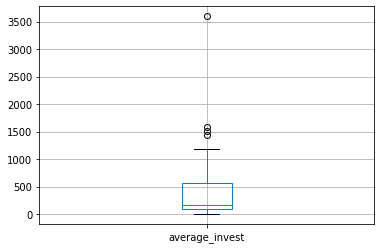

In [ ]:
mdf.boxplot(column = ['average_invest'])

In [ ]:
use = ['average_invest', 'average_realGDP']
#find absolute value of z-score for each observation
z = np.abs(stats.zscore(mdf[use]))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
mdf = mdf[use][(z<3).all(axis=1)]

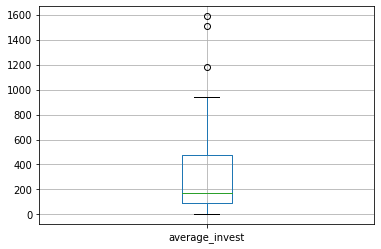

In [ ]:
mdf.boxplot(column = ['average_invest'])

Linear assumption is met, however fit could be better with some transformations.

(0.0, 60000.0)

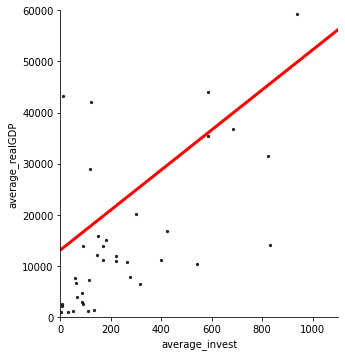

In [ ]:
g = sns.lmplot(x='average_invest',y='average_realGDP',data=mdf,
          ci=0,line_kws={'color':'r','lw':3},scatter_kws={'color':'k','s':5})

ax = g.axes[0,0]
ax.set_xlim((0,1100))
ax.set_ylim((0,60000))

Transforming the x variable seems somewhat better, but not great.

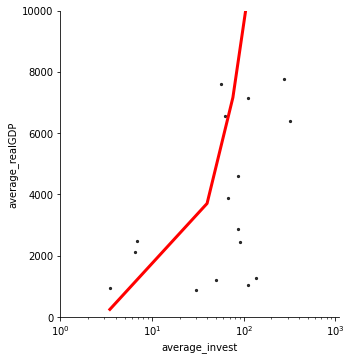

In [ ]:
g = sns.lmplot(x='average_invest',y='average_realGDP',data=mdf,
          ci=0,line_kws={'color':'r','lw':3},scatter_kws={'color':'k','s':5})

ax = g.axes[0,0]
ax.set_xlim((1,1100))
ax.set_ylim((0,10000))
ax.set_xscale('log')

Transforming the y variable produces really promising results - we'll test model with this.

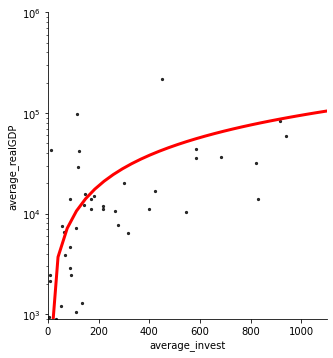

In [ ]:
g = sns.lmplot(x='average_invest',y='average_realGDP',data=mdf,
          ci=0,line_kws={'color':'r','lw':3},scatter_kws={'color':'k','s':5})

ax = g.axes[0,0]
ax.set_xlim((0,1100))
ax.set_ylim((900,1000000))
ax.set_yscale('log')

In [ ]:
feature_df = mdf[['average_invest']]
label_df = mdf['average_realGDP']
logLabel_df = label_df.apply(np.log)

In [ ]:
def linear_regression_assumptions(features, label, feature_names=None):
    """
    Tests a linear regression on the model to see if assumptions are being met
    """
    from sklearn.linear_model import LinearRegression
    
    # Setting feature names to x1, x2, x3, etc. if they are not defined
    if feature_names is None:
        feature_names = ['X'+str(feature+1) for feature in range(features.shape[1])]
    
    print('Fitting linear regression')
    # Multi-threading if the dataset is a size where doing so is beneficial
    if features.shape[0] < 100000:
        model = LinearRegression(n_jobs=-1)
    else:
        model = LinearRegression()
        
    model.fit(features, label)
    
    # Returning linear regression R^2 and coefficients before performing diagnostics
    r2 = model.score(features, label)
    print()
    print('R^2:', r2, '\n')
    print('Coefficients')
    print('-------------------------------------')
    print('Intercept:', model.intercept_)
    
    for feature in range(len(model.coef_)):
        print('{0}: {1}'.format(feature_names[feature], model.coef_[feature]))

    print('\nPerforming linear regression assumption testing')
    
    # Creating predictions and calculating residuals for assumption tests
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    
    def linear_assumption():
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
        # Plotting the diagonal line
        line_coords = np.arange(df_results.min().min(), df_results.max().max())
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term')
        
        
    def normal_errors_assumption(p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
               
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        print('\n=======================================================================================')
        print('Assumption 2: The error terms are normally distributed')
        print()
    
        print('Using the Anderson-Darling test for normal distribution')

        # Performing the test on the residuals
        p_value = normal_ad(df_results['Residuals'])[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
    
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(df_results['Residuals'])
        plt.show()
    
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
        else:
            print('Assumption not satisfied')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
        
        
    def multicollinearity_assumption():
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        print('\n=======================================================================================')
        print('Assumption 3: Little to no multicollinearity among predictors')
        
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(pd.DataFrame(features, columns=feature_names).corr(), annot=True)
        plt.title('Correlation of Variables')
        plt.show()

        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
       
       
    def autocorrelation_assumption():
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson
        print('\n=======================================================================================')
        print('Assumption 4: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(df_results['Residuals'])
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            print('Consider adding lag variables')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')

            
    def homoscedasticity_assumption():
        """
        Homoscedasticity: Assumes that the errors exhibit constant variance
        """
        print('\n=======================================================================================')
        print('Assumption 5: Homoscedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroscedasticity is apparent, confidence intervals and predictions will be affected')
        
        
    linear_assumption()
    normal_errors_assumption()
    multicollinearity_assumption()
    autocorrelation_assumption()
    homoscedasticity_assumption()

Fitting linear regression

R^2: 0.37217562567369944 

Coefficients
-------------------------------------
Intercept: 6.402322057521211
X1: 0.5765357903237072

Performing linear regression assumption testing

Assumption 1: Linear Relationship between the Target and the Features
Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


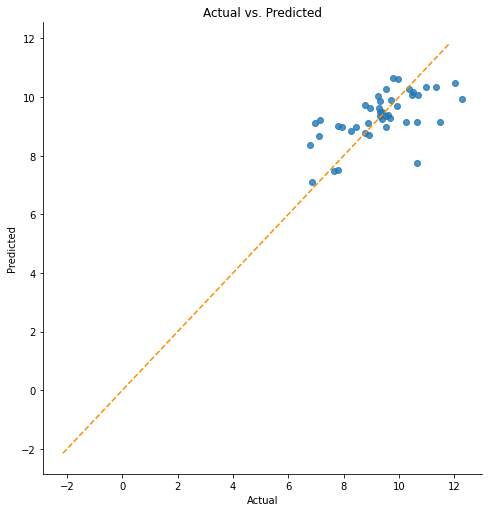

If non-linearity is apparent, consider adding a polynomial term

Assumption 2: The error terms are normally distributed

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.10533308696598737
Residuals are normally distributed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


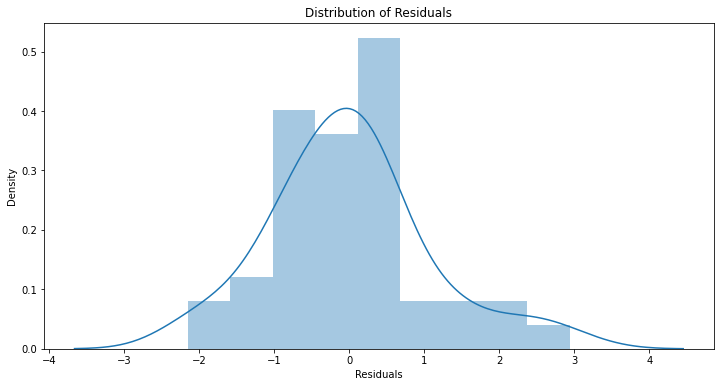


Assumption satisfied

Assumption 3: Little to no multicollinearity among predictors


/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


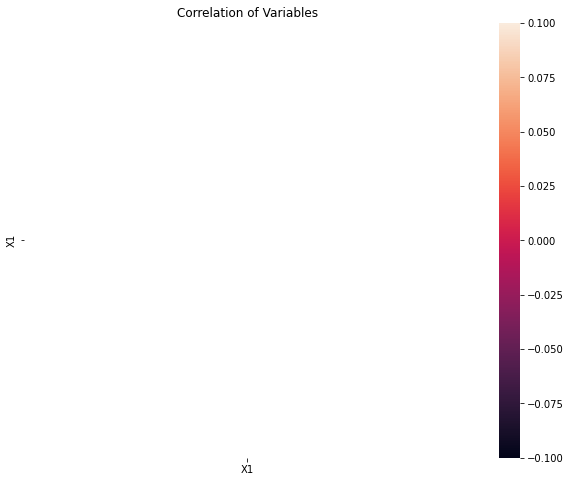

Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------

Assumption 4: No Autocorrelation

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.3778591970316163
Little to no autocorrelation 

Assumption satisfied

Assumption 5: Homoscedasticity of Error Terms
Residuals should have relative constant variance


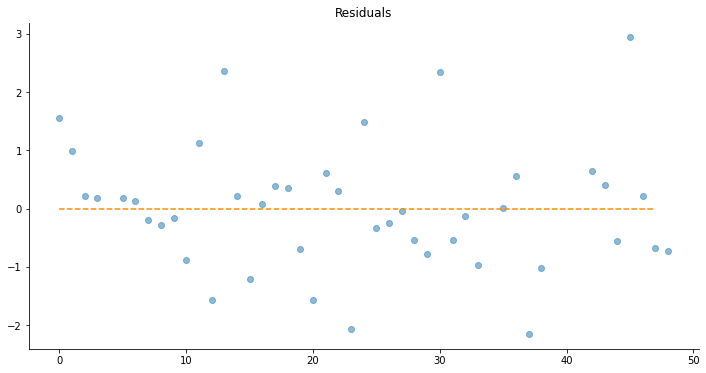

If heteroscedasticity is apparent, confidence intervals and predictions will be affected


In [ ]:
linear_regression_assumptions(feature_df, logLabel_df)

Assumptions cleared with the log transformed dependent variable.

In [ ]:
# Adding the intercept constant for the statsmodels API
X_train_for_statsmodels_api = sm.add_constant(feature_df, prepend=False)

# Fitting the model and viewing the model summary
mod = sm.OLS(logLabel_df, X_train_for_statsmodels_api)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        average_realGDP   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     26.82
Date:                Tue, 03 May 2022   Prob (F-statistic):           5.33e-06
Time:                        18:50:21   Log-Likelihood:                -72.741
No. Observations:                  46   AIC:                             149.5
Df Residuals:                      44   BIC:                             153.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
average_invest     0.0015      0.000      5.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


When looking at the results of this analysis, our model produced a model fit of 37.9%, which can be seen by our R-Squared metric. Look to our average_invest coefficient, our model indicates that for a one unit increase in avg_invest will result, on average, in a slope coefficient (0.0015) increase in log(average_realGDP).

## Formal Report

Submitted formal report alongside this colab document in Canvas.

Here's another link: https://docs.google.com/document/d/1OM9-MybXu_v9n67cAsEWHjMRsmpMcLiFYjRJUxJqOH4/edit?usp=sharing
